# Observations
From the data below i have observed
1) The temperature increases towards the equator and as you get further away from the equator it begins to fall.
2) The humidity level is very high in most of the cities around the equator where most have a humidity level above 60%
3) wind speed in most cities near the equator is approxmately 15mph

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000,size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


634

## Perform API Calls

In [4]:
# OpenWeatherMap API Key

api_key="a0a49b9fe9580ae02750d6d58b0a2031"
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key+"&q=" 
name=[]
ctyid=[]
m_temp=[]
humidity=[]
cloudiness=[]
wind=[]
citiesL=[]
lat=[]
lng=[]
data=0

print("Beginning City Data Retrieval")
print("--------------------------------")
for x in cities:
    citiesL.append(x)
    cityurl=url+x
    #get the json data
    response=requests.get(cityurl).json()
    #parse data to list
    try:
        lats=response["coord"]["lat"]
        lat.append(lats)
        lngs=response["coord"]["lon"]
        lng.append(lngs)
        temp=response["main"]["temp"]
        m_temp.append(temp)
        hum=response["main"]["humidity"]
        humidity.append(hum)
        cloud=response["clouds"]["all"]
        cloudiness.append(cloud)
        winds=response["wind"]["speed"]
        wind.append(winds)
        ctyname=response["name"]
        name.append(ctyname)
        idc=response["id"]
        ctyid.append(idc)
        print("City name :"+str(ctyname)+"  id: "+str(idc))
        

    except KeyError:
        data=data+1

print(data) 

print("-----------------------------------------")
print("City Data Retrieval Complete")


Beginning City Data Retrieval
--------------------------------
City name :Vardo  id: 4372777
City name :Aasiaat  id: 3424901
City name :Bredasdorp  id: 1015776
City name :Rikitea  id: 4030556
City name :Sitka  id: 4267710
City name :Yellowknife  id: 6185377
City name :Lompoc  id: 5367788
City name :Ponta do Sol  id: 3453439
City name :Mahibadhoo  id: 1337605
City name :Khatanga  id: 2022572
City name :Thompson  id: 6165406
City name :Talnakh  id: 1490256
City name :Egvekinot  id: 4031742
City name :Port Alfred  id: 964432
City name :New Norfolk  id: 2155415
City name :Shingu  id: 1847947
City name :Hirara  id: 1862505
City name :Husavik  id: 5961417
City name :Beringovskiy  id: 2126710
City name :Tecpan  id: 3588476
City name :Solginskiy  id: 491029
City name :Kapaa  id: 5848280
City name :Shimoda  id: 1852357
City name :Nikolskoye  id: 546105
City name :Buala  id: 2109528
City name :Broken Hill  id: 2173911
City name :Upernavik  id: 3418910
City name :Carnarvon  id: 1014034
City name 

City name :Karlskoga  id: 2701715
City name :San Borja  id: 3905792
City name :Yulara  id: 6355222
City name :Ales  id: 3038224
City name :Saint-Augustin  id: 3031582
City name :Inhambane  id: 1045114
City name :Woodward  id: 4556050
City name :Namibe  id: 3347019
City name :Puerto Carreno  id: 3671519
City name :Kralendijk  id: 3513563
City name :Nevers  id: 2990474
City name :Sao Felix do Xingu  id: 3388847
City name :Ribeira Grande  id: 3372707
City name :Longyearbyen  id: 2729907
City name :Kaeo  id: 2189343
City name :Manga  id: 2358100
City name :Santa Barbara  id: 5392952
City name :Antakya  id: 323779
City name :Lerwick  id: 2644605
City name :Paamiut  id: 3421193
City name :Arraial do Cabo  id: 3471451
City name :Ardakan  id: 143073
City name :Abrau-Dyurso  id: 584365
City name :Lashio  id: 1314759
City name :Teguise  id: 2510573
City name :Fuling  id: 1810979
City name :Ambovombe  id: 1079048
City name :Gonzales  id: 5352997
City name :Cockburn Town  id: 3576994
City name :Pe

City name :Inyonga  id: 159134
City name :Kotra  id: 1265954
City name :Thunder Bay  id: 6166142
City name :Port Shepstone  id: 964406
City name :Makakilo City  id: 5850554
City name :Killin  id: 4117436
City name :Trinidad  id: 3439749
City name :Mahdasht  id: 125188
City name :Koumac  id: 2140558
City name :Aldan  id: 2027968
City name :Joshimath  id: 1268814
City name :Noyabrsk  id: 1496503
City name :Le Vauclin  id: 3570392
City name :Esik  id: 1523741
City name :Lasa  id: 146639
City name :Taoudenni  id: 2450173
City name :Erzin  id: 296852
City name :Sobolevo  id: 525426
City name :Pochutla  id: 3517970
City name :Wanaka  id: 2184707
City name :Sambava  id: 1056899
City name :Pacific Grove  id: 5380437
City name :Kiama  id: 2161515
City name :Bengbu  id: 1816440
City name :Trincomalee  id: 1226260
City name :Gweta  id: 933734
City name :Scranton  id: 5211303
City name :Gawler  id: 2071059
City name :Gat  id: 2249901
City name :Cabanas  id: 3119841
City name :Erenhot  id: 2037485


In [6]:
#create dataframe
eWeather={
    "Id":ctyid,
    "City": name,
    "Latitude":lat,
    "Longitude":lng,
    "Temperature(Max(F))":m_temp,
    "Humidity":humidity,
    "Cloudiness": cloudiness,
    "Wind Speed(mph)":wind
    
}
equator_df=pd.DataFrame(eWeather)
equator_df.head()

,Id,City,Latitude,Longitude,Temperature(Max(F)),Humidity,Cloudiness,Wind Speed(mph)
0,4372777,Vardo,39.62,-77.74,76.10,65,1,5.82
1,3424901,Aasiaat,68.71,-52.87,45.50,87,0,6.33
2,1015776,Bredasdorp,-34.53,20.04,53.60,87,92,4.70
3,4030556,Rikitea,-23.12,-134.97,72.59,100,32,13.94
4,4267710,Sitka,37.17,-99.65,87.17,58,0,8.34


In [7]:
#creating and saving csv file
equator_df.to_csv("cities.csv")

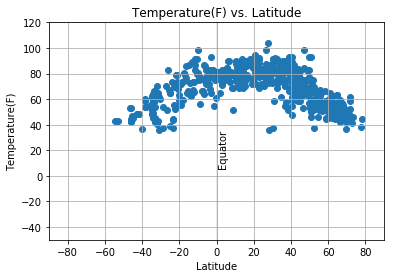

In [16]:
#Plotting the scatter plots
#Temperature Vs Latitude
plt.scatter(equator_df["Latitude"],equator_df["Temperature(Max(F))"])

plt.title("Temperature(F) vs. Latitude")
plt.ylabel("Temperature(F)")
plt.axvline(0,color = 'black', alpha =.10,label='Equator')
plt.text(1,30,'Equator',rotation=90)
plt.ylim(-50,120)
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.grid(True)
plt.savefig("EquatorPlots/TempVsLat.png")
plt.show()

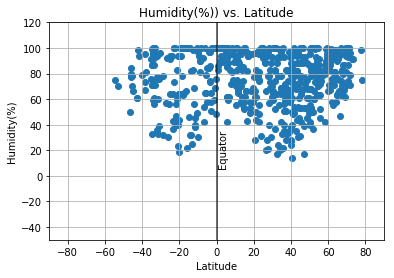

In [17]:
plt.scatter(equator_df["Latitude"],equator_df["Humidity"],marker ="o")

plt.title("Humidity(%)) vs. Latitude")
plt.ylabel("Humidity(%)")
plt.axvline(0,color = 'black', alpha =.75,label='Equator')
plt.text(1,30,'Equator',rotation=90)
plt.ylim(-50,120)
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.grid(True)
plt.savefig("EquatorPlots/HumidityVsLat.png")
plt.show()

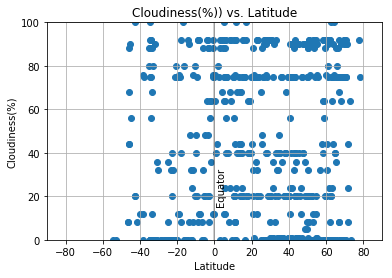

In [18]:
#Cloudiness(%) Vs. Latitude

plt.scatter(equator_df["Latitude"],equator_df["Cloudiness"])

plt.title("Cloudiness(%)) vs. Latitude")
plt.ylabel("Cloudiness(%)")
plt.axvline(0,color = 'black', alpha =.25,label='Equator')
plt.text(1,30,'Equator',rotation=90)
plt.ylim(0,100)
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.grid(True)
plt.savefig("EquatorPlots/CloudinessVsLat.png")
plt.show()

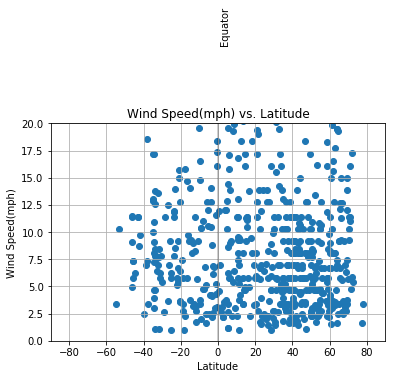

In [19]:
#Wind speed Vs. Latitude

plt.scatter(equator_df["Latitude"],equator_df["Wind Speed(mph)"])

plt.title("Wind Speed(mph) vs. Latitude")
plt.ylabel("Wind Speed(mph)")
plt.axvline(0,color = 'black', alpha =.25,label='Equator')
plt.text(1,30,'Equator',rotation=90)
plt.ylim(0,20)
plt.xlabel("Latitude")
plt.xlim(-90,90)
plt.grid(True)
plt.savefig("EquatorPlots/WindSpeedVsLat.png")
plt.show()